In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import geoplot as gplt

from data_cleaner import cleaner, geo_cleaner

In [73]:
data = pd.read_csv("./data/alcohol-consumption.csv")
data = cleaner(data)
data.head(5)

,country,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage,dominant_alcohol
0,Albania,7.5,5.0,2.5,34.3,26.5,37.6,1.7,Spirits
1,Andorra,11.3,10.1,1.6,34.1,42.0,23.9,0.0,Wine
2,Armenia,5.5,3.8,1.7,10.6,7.0,82.3,0.1,Spirits
3,Austria,11.6,11.4,0.4,53.5,31.6,14.9,0.0,Beer
4,Azerbaijan,0.8,0.5,0.3,61.5,36.9,0.0,1.5,Beer


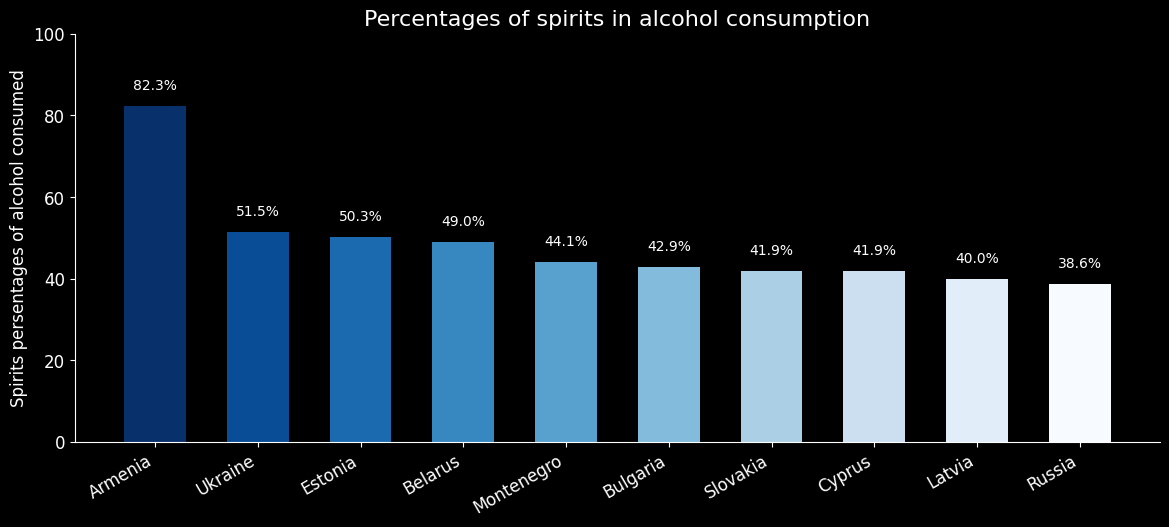

In [3]:
sorted_by_spirits = data.sort_values(by='spirits_percentage', ascending=False)
x = sorted_by_spirits['country'].head(10)
y = sorted_by_spirits['spirits_percentage'].head(10)

# Tworzenie mapy kolorów
cmap = plt.cm.Blues_r  # Wybór mapy kolorów
colors = cmap(np.linspace(0, 1, len(y)))  # Generowanie kolorów dla każdego słupka

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(14, 6))
plt.ylim((0, 100))

ax.bar(x, y, width=0.6, color=colors)

for i, liters in enumerate(y):
    ax.text(i, liters + 5, f"{liters}%", ha="center", va="center")

ax.set_title("Percentages of spirits in alcohol consumption", fontsize=16)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Spirits persentages of alcohol consumed", fontsize=12)
ax.tick_params(labelsize=12)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.autofmt_xdate()

In [75]:
geodata = gpd.read_file('./europe.geojson')
geodata = geo_cleaner(geodata)

merged_data = geodata.merge(data, on='country', how='inner')

merged_data.head(5)


,country,geometry,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage,dominant_alcohol
0,Albania,"POLYGON ((19.43621 41.02106, 19.45055 41.06, 1...",7.5,5.0,2.5,34.3,26.5,37.6,1.7,Spirits
1,Andorra,"POLYGON ((1.78172 42.56996, 1.77472 42.57111, ...",11.3,10.1,1.6,34.1,42.0,23.9,0.0,Wine
2,Armenia,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40...",5.5,3.8,1.7,10.6,7.0,82.3,0.1,Spirits
3,Austria,"POLYGON ((13.83361 48.7736, 13.85806 48.77055,...",11.6,11.4,0.4,53.5,31.6,14.9,0.0,Beer
4,Azerbaijan,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39...",0.8,0.5,0.3,61.5,36.9,0.0,1.5,Beer


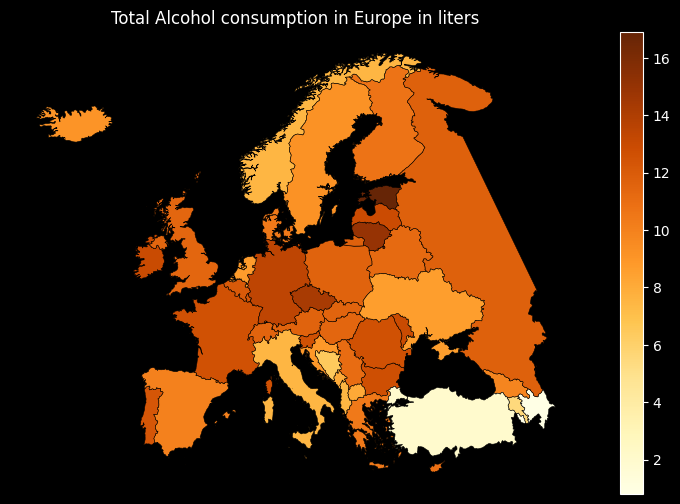

In [68]:

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10, 6))

merged_data.plot(column='total_consumption', cmap='YlOrBr', legend=True, ax=ax, edgecolor='black', linewidth=0.4)
ax.set_title("Total Alcohol consumption in Europe in liters")
plt.axis('off')
plt.show()

In [51]:
color_map = {
    'Beer': '#ffd60a',
    'Wine': '#e5383b',
    'Spirits': '#1982c4'
}

C:\Users\gruby\AppData\Local\Temp\ipykernel_26828\1669905310.py:3: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  merged_data.plot(column='dominant_alcohol', cmap=None, color=merged_data['dominant_alcohol'].map(color_map), legend=True, ax=ax, edgecolor='black', linewidth=0.4)


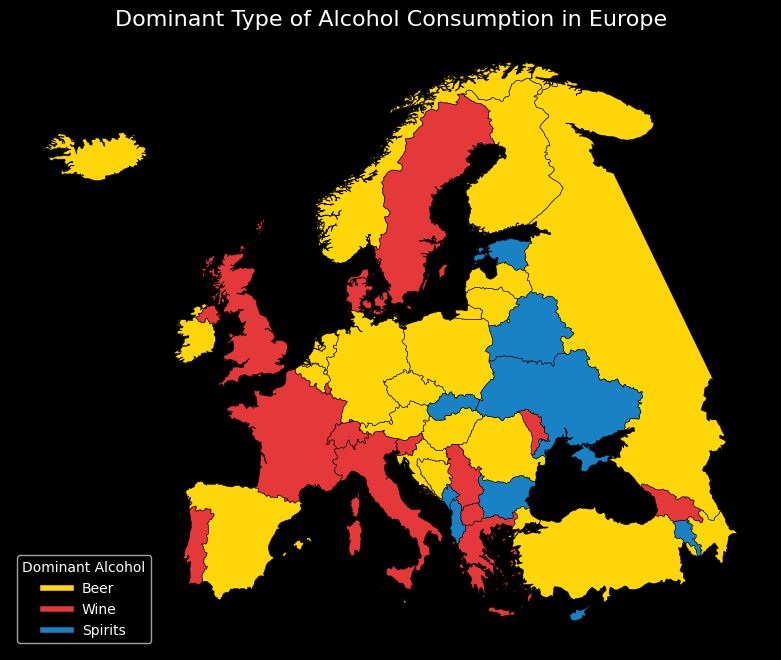

In [72]:
fig, ax = plt.subplots(figsize=(12, 8))

merged_data.plot(column='dominant_alcohol', cmap=None, color=merged_data['dominant_alcohol'].map(color_map), legend=True, ax=ax, edgecolor='black', linewidth=0.4)

legend_labels = [
    plt.Line2D([0], [0], color='#ffd60a', lw=4, label='Beer'),
    plt.Line2D([0], [0], color='#e5383b', lw=4, label='Wine'),
    plt.Line2D([0], [0], color='#1982c4', lw=4, label='Spirits')
]
ax.legend(handles=legend_labels, title='Dominant Alcohol', loc='lower left')

ax.set_title("Dominant Type of Alcohol Consumption in Europe", fontsize=16)
plt.axis('off')
plt.show()

In [76]:
total_beer_percentage = data['beer_percentage'].sum()
total_wine_percentage = data['wine_percentage'].sum()
total_spirits_percentage = data['spirits_percentage'].sum()

alcohol_data = {
    'Beer': total_beer_percentage,
    'Wine': total_wine_percentage,
    'Spirits': total_spirits_percentage
}

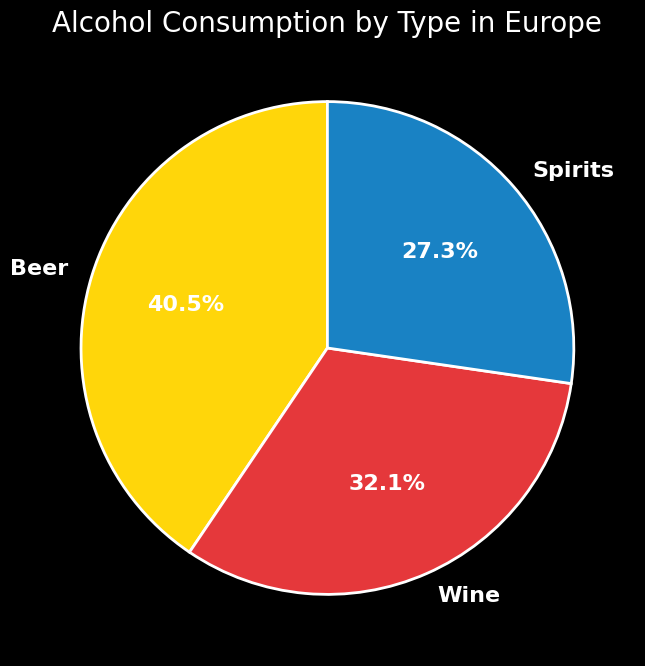

In [93]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.pie(alcohol_data.values(),
       labels=alcohol_data.keys(),
       autopct='%1.1f%%', startangle=90,
       colors=['#ffd60a', '#e5383b', '#1982c4'],
       textprops={'fontsize': 16, 'fontweight': 'bold'},
       wedgeprops={'edgecolor': 'white', 'linewidth': 2}
    )

ax.set_title("Alcohol Consumption by Type in Europe", fontsize=20)
plt.show()